In [100]:
import cv2
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import Dependency
import Parameters
import math
from scipy.optimize import curve_fit

In [101]:
def log_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

In [102]:
path =  os.getcwd()[:-5] + 'Analysis/probabilistic_analysis/Raw_for_analysis/'
df = pd.read_csv(path + 'vaccine_paper_2.csv')
groups = df.groupby('Source')
print(df)

            Source         Type                   Dose  Month  Week_start  \
0   Andrews et al.    BNT-162b2                 Dose 1    2.0           0   
1   Andrews et al.    BNT-162b2                 Dose 1    4.0           4   
2   Andrews et al.    BNT-162b2                 Dose 2    1.0           0   
3   Andrews et al.    BNT-162b2                 Dose 2    3.5           2   
4   Andrews et al.    BNT-162b2                 Dose 2    7.5           5   
..             ...          ...                    ...    ...         ...   
64             CDC  Unspecified                 Dose 2   20.0          20   
65             CDC  Unspecified  Booster (unspecified)    4.0           0   
66             CDC  Unspecified  Booster (unspecified)   12.0           8   
67             CDC  Unspecified  Booster (unspecified)   18.0          16   
68             CDC  Unspecified  Booster (unspecified)   20.0          20   

    Week_end  Effectiveness  Effectiveness_min  Effectiveness_max  
0      

In [86]:
dose21 = np.zeros(shape=(7 * 104, ))
dose31 = np.zeros(shape=(7 * 104,))

C:\Users\loveb\AppData\Local\Temp\ipykernel_11932\1151186027.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose21)


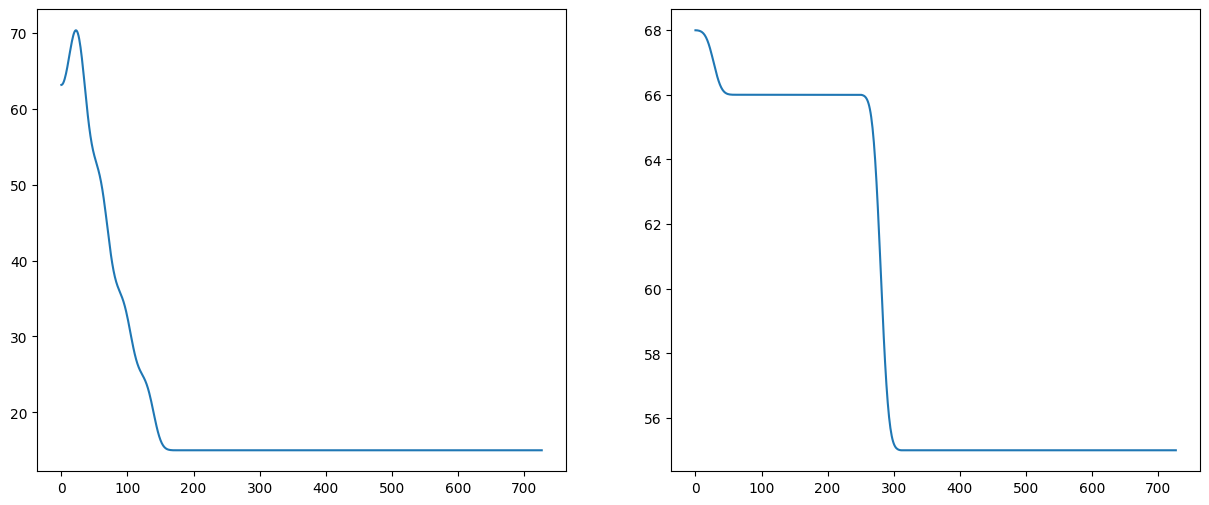

In [103]:
paper1 = groups.get_group('Andrews et al.')
paper2 = groups.get_group('Ferdinands et al.')
paper3 = groups.get_group('CDC')
for i in range(len(paper1)):
    row = paper1.iloc[i]
    start = int(row['Week_start'])
    if math.isnan(row['Week_end']):
        end = 104
    else:
        end = int(row['Week_end'])
    if row['Dose'] == 'Dose 1':
        pass
    elif row['Dose'] == 'Dose 2':
        dose21[start*7:end*7+1] = row['Effectiveness']
    else:
        dose31[start*7:end*7+1] = row['Effectiveness']
    # print(start*7, end*7+1)
    # print(dose3[725])

dose21 = np.reshape(cv2.GaussianBlur(dose21.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))
dose31 = np.reshape(cv2.GaussianBlur(dose31.reshape(7 * 104, 1), (61, 61), 0), newshape=(7 * 104,))

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose21)
plt.subplot(1, 2, 2), plt.plot(dose31)
plt.show()

In [105]:
dose22 = np.zeros(shape=(7 * 104, ))
dose32 = np.zeros(shape=(7 * 104,))

(array([505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647,
       648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660,
       661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673,
       674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 6

C:\Users\loveb\AppData\Local\Temp\ipykernel_11932\214803007.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose22)


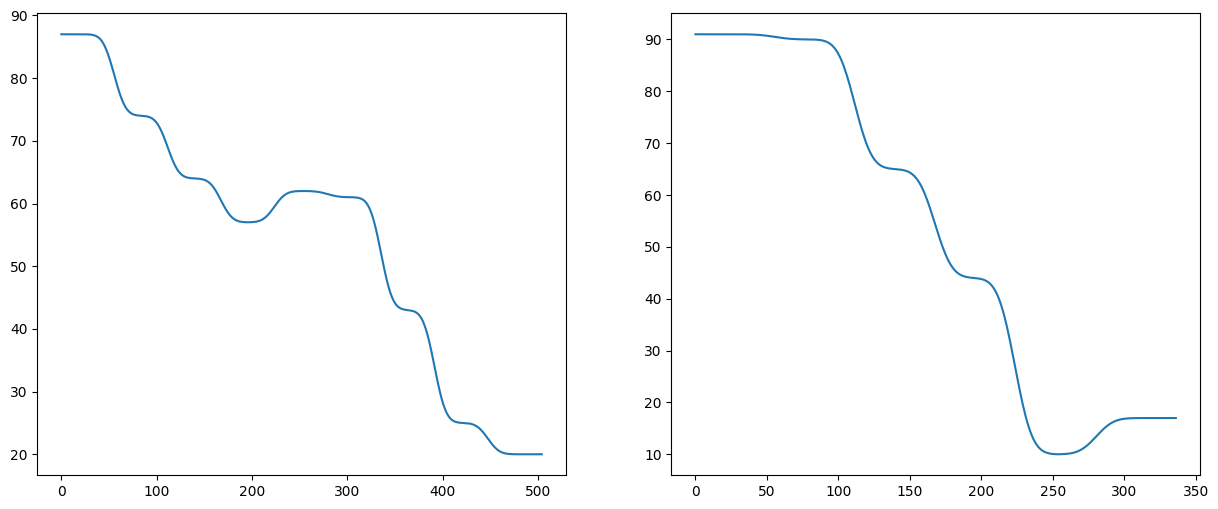

In [106]:
for i in range(len(paper2)):
    row = paper2.iloc[i]
    start = int(row['Week_start'])
    if math.isnan(row['Week_end']):
        end = 104
    else:
        end = int(row['Week_end'])
    if row['Dose'] == 'Dose 1':
        pass
    elif row['Dose'] == 'Dose 2':
        dose22[start*7:end*7+1] = row['Effectiveness']
    else:
        dose32[start*7:end*7+1] = row['Effectiveness']

print(np.where(dose22 == 0))

dose22 = dose22[:np.where(dose22 == 0)[0][0]]
dose32 = dose32[:np.where(dose32 == 0)[0][0]]

dose22 = np.reshape(cv2.GaussianBlur(dose22.reshape(dose22.shape[0], 1), (61, 61), 0), newshape=(dose22.shape[0], ))
dose32 = np.reshape(cv2.GaussianBlur(dose32.reshape(dose32.shape[0], 1), (61, 61), 0), newshape=(dose32.shape[0], ))

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose22)
plt.subplot(1, 2, 2), plt.plot(dose32)
plt.show()

In [107]:
dose23 = np.zeros(shape=(7 * 104, ))
dose33 = np.zeros(shape=(7 * 104,))

0 8
8 16
16 20
20 104


C:\Users\loveb\AppData\Local\Temp\ipykernel_11932\2133365663.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose23)


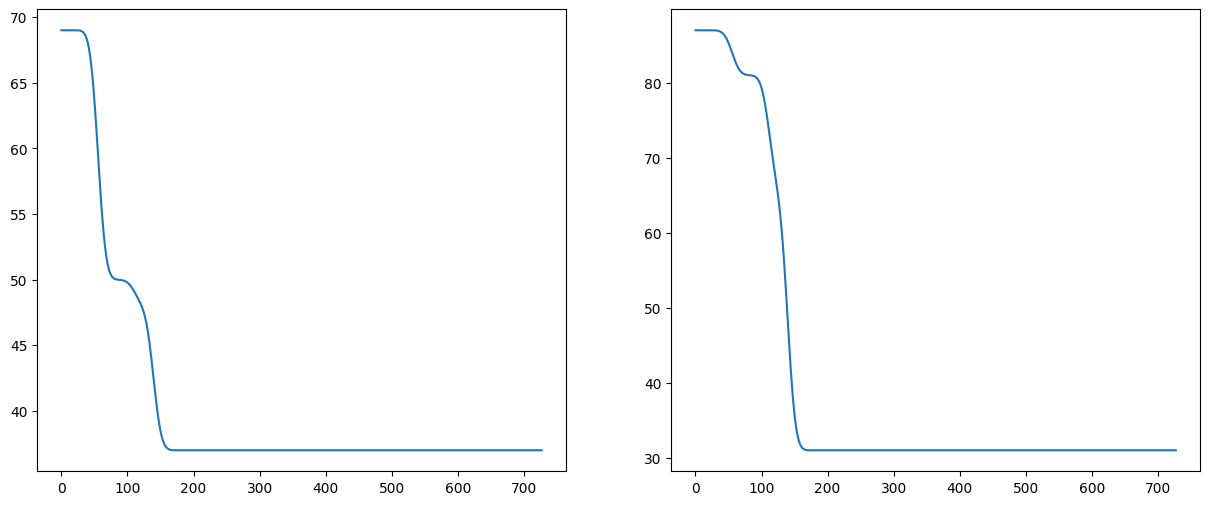

In [109]:
for i in range(len(paper3)):
    row = paper3.iloc[i]
    start = int(row['Week_start'])
    if math.isnan(row['Week_end']):
        end = 104
    else:
        end = int(row['Week_end'])
    if row['Dose'] == 'Dose 1':
        pass
    elif row['Dose'] == 'Dose 2':
        dose23[start*7:end*7+1] = row['Effectiveness']
    else:
        dose33[start*7:end*7+1] = row['Effectiveness']
        print(start, end)

# dose23 = dose23[:np.where(dose23 == 0)[0][0]]
# dose33 = dose33[:np.where(dose33 == 0)[0][0]]


dose23 = np.reshape(cv2.GaussianBlur(dose23.reshape(dose23.shape[0], 1), (61, 61), 0), newshape=(dose23.shape[0], ))
dose33 = np.reshape(cv2.GaussianBlur(dose33.reshape(dose33.shape[0], 1), (61, 61), 0), newshape=(dose33.shape[0], ))

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose23)
plt.subplot(1, 2, 2), plt.plot(dose33)
plt.show()

C:\Users\loveb\AppData\Local\Temp\ipykernel_11932\50412692.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(dose2)


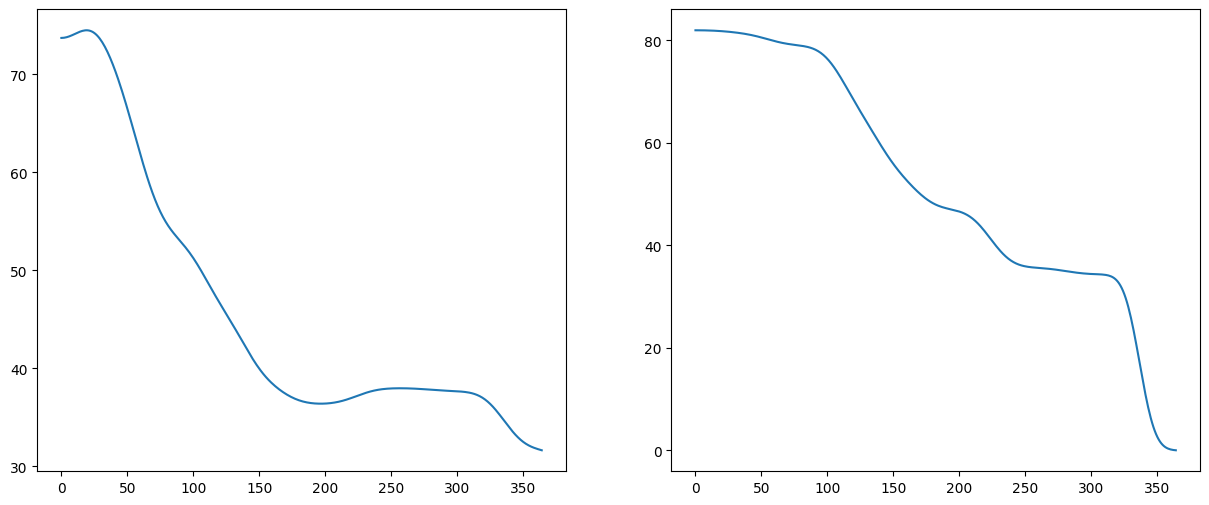

In [124]:
dose2 = np.zeros(shape=(7 * 104, ))
dose3 = np.zeros(shape=(7 * 104,))

shortest2 = min(dose21.shape[0], dose22.shape[0], dose23.shape[0])

dose2[:shortest2] = np.mean(np.concatenate([dose21[:shortest2].reshape(shortest2, 1), dose22[:shortest2].reshape(shortest2, 1), dose23[:shortest2].reshape(shortest2, 1)], axis=1), axis=1)

dose2[shortest2:dose22.shape[0]] = np.mean(np.concatenate([dose21[shortest2:dose22.shape[0]].reshape(dose22.shape[0] - shortest2, 1), dose22[shortest2:dose22.shape[0]].reshape(dose22.shape[0] - shortest2, 1)], axis=1), axis=1)

dose2[dose22.shape[0]:] = dose21[dose22.shape[0]:]


shortest3 = min(dose31.shape[0], dose32.shape[0], dose33.shape[0])


dose3[:shortest3] = np.mean(np.concatenate([dose31[:shortest3].reshape(shortest3, 1), dose32[:shortest3].reshape(shortest3, 1), dose33[:shortest3].reshape(shortest3, 1)], axis=1), axis=1)

dose3[shortest3:dose32.shape[0]] = np.mean(np.concatenate([dose21[shortest3:dose32.shape[0]].reshape(dose32.shape[0] - shortest3, 1), dose32[shortest3:dose32.shape[0]].reshape(dose32.shape[0] - shortest2, 1)], axis=1), axis=1)


dose2 = np.reshape(cv2.GaussianBlur(dose2.reshape(dose2.shape[0], 1), (61, 61), 0), newshape=(dose3.shape[0], ))[:365]
dose3 = np.reshape(cv2.GaussianBlur(dose3.reshape(dose3.shape[0], 1), (61, 61), 0), newshape=(dose33.shape[0], ))[:365]

plt.figure(figsize=(15,6))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(dose2)
plt.subplot(1, 2, 2), plt.plot(dose3)
plt.show()

range(0, 365)


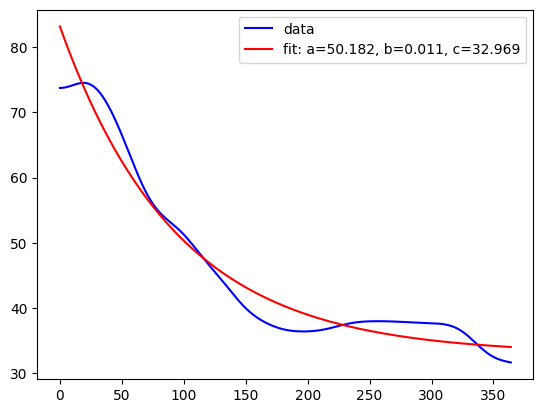

In [135]:
xdata = range(0, dose2.shape[0])
print(xdata)
ydata = dose2
popt, pcov = curve_fit(log_fit, xdata, ydata,  bounds=(0, [100, 100, 100]))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, log_fit(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

range(0, 365)


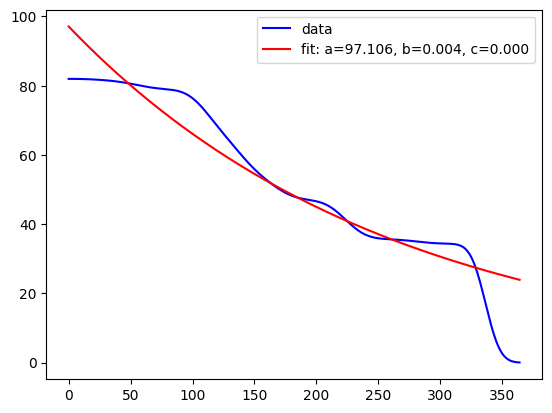

In [136]:
xdata = range(0, dose3.shape[0])
print(xdata)
ydata = dose3
popt, pcov = curve_fit(log_fit, xdata, ydata, bounds=(0, [100, 100, 100]))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, log_fit(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()